In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# Load data
df = pd.read_csv('PFE-Pfizer.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,41.375713,41.546490,41.072105,41.138519,33.767422,26667781
1,2019-03-04,41.214420,41.356735,40.683113,40.863377,33.541576,22805820
2,2019-03-05,40.882355,41.034157,40.654648,40.692600,33.401398,26529812
3,2019-03-06,40.626186,40.673622,39.487667,39.715370,32.599270,22410359
4,2019-03-07,39.715370,39.743832,39.136623,39.269451,32.233242,29046132
...,...,...,...,...,...,...,...
1254,2024-02-23,27.750000,28.090000,27.690001,27.760000,27.760000,33182600
1255,2024-02-26,27.670000,27.670000,27.070000,27.180000,27.180000,45685500
1256,2024-02-27,27.120001,27.200001,26.809999,26.889999,26.889999,38598400
1257,2024-02-28,26.959999,27.240000,26.820000,27.040001,27.040001,31010200


In [3]:
df1=df.reset_index()['Close']

In [4]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
# Split train and test data
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# Function to create dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [9]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


D:\Anaconda\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Fit model with train data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2460
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0239
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0177
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0104
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0071
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0046
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0030
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0018
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0011
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0011
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 9.6754e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0010  
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.8428e-04
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms

In [11]:
# Predict train and test data
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 34.84538478342901
Mean Squared Error (MSE): 1238.9275574859573
R-squared (R2): -57014.02329678601
Root Mean Squared Error (RMSE): 35.19840276896037
Mean Absolute Percentage Error (MAPE): inf%


C:\Users\hoain\AppData\Local\Temp\ipykernel_26080\3131831318.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [13]:
# Predict next 90 days
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 90):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

[0.01968769]
101
1 day input [0.20130985 0.20045555 0.1987472  0.1933371  0.1702734  0.20330298
 0.18849661 0.15034171 0.1440775  0.12870162 0.13411164 0.12243738
 0.13097952 0.14322326 0.11332579 0.12585421 0.12613895 0.12471529
 0.12443055 0.14607064 0.14379274 0.1457859  0.13354217 0.10108203
 0.09538727 0.08115037 0.08912303 0.1156037  0.10364467 0.10791574
 0.10962417 0.11873576 0.11930526 0.12443055 0.11417995 0.1013668
 0.11247155 0.12357631 0.0791572  0.08969254 0.08428249 0.07574037
 0.07118451 0.07545564 0.07146925 0.06976085 0.01509114 0.
 0.0142369  0.02648064 0.05780185 0.0427107  0.06207289 0.06463556
 0.0649203  0.07061509 0.07574037 0.07574037 0.10250572 0.10250572
 0.08428249 0.0951025  0.09823465 0.09310937 0.08143511 0.06463556
 0.07317773 0.06235766 0.05751711 0.05580868 0.06121873 0.06207289
 0.06548978 0.0626424  0.0381549  0.0381549  0.03843966 0.02534171
 0.02705014 0.03302967 0.02277907 0.0125285  0.03900914 0.04071754
 0.04100231 0.04071754 0.04356495 0.023917

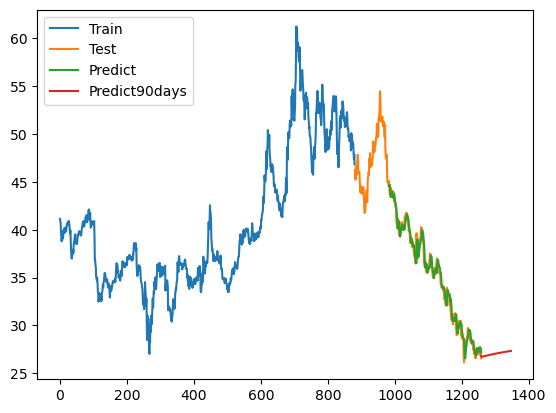

In [14]:
# Plot the results
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
plt.plot(test_data_index, y_pred)
prediect_data_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 89, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.savefig('Image/GRU_73_90days_PFE.png')
plt.show()
